In [1]:
import pygame as pg
import sys
import random
import numpy as np

pygame 2.4.0 (SDL 2.26.4, Python 3.11.1)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def obstacle_render(obs_list,obst_list):
    if obs_list:
        for i in range (len(obs_list)):
            screen.blit(pipe,pipe.get_rect(topright=obs_list[i]))
            screen.blit(pipet,pipet.get_rect(topright=obst_list[i]))
            obst_list[i][0]=obst_list[i][0]-4
            obs_list[i][0]=obst_list[i][0]-4
        if obs_list[0][0]<100:
            del obs_list[0]
            del obst_list[0]
        return obs_list,obst_list
    else:
        return[],[]

In [3]:
def create_tile_encoding(state, num_tiles_x=50, num_tiles_y=65, num_tiles_velocity=10):
    # Define the ranges for x, y, and velocity
    x=state[0]
    y=state[1]
    velocity=state[2]
    min_x, max_x = 0, 620
    min_y, max_y = 0, 1000
    min_velocity, max_velocity = 0, 69
    
    # Calculate tile widths for each dimension
    tile_width_x = (max_x - min_x) / num_tiles_x
    tile_width_y = (max_y - min_y) / num_tiles_y
    tile_width_velocity = (max_velocity - min_velocity) / num_tiles_velocity
    
    # Calculate the tile indices for each dimension
    tile_index_x = int((x - min_x) // tile_width_x)
    tile_index_y = int((y - min_y) // tile_width_y)
    tile_index_velocity = int((velocity - min_velocity) // tile_width_velocity)
    
    return [tile_index_x,tile_index_y,tile_index_velocity]

In [4]:
# x = horizontal distance between birdcenter and the pipe right range={0,4,....,604}, 50 tiles
# y = vertical distance of birdcenter and bottom pipe top range=[-300,475], 50 tiles
# z = velocity of the bird range=[-47,21], 10 tiles 
# last one denotes action
Q_value=np.zeros((50,65,10,2))

In [11]:
#eps is choosen according to mode. While training, increase it. While displaying or to play with optimal policy,
#choose eps very small(AROUND 1e-10).
eps=0.000000000001
td_error=0.8
Y=0.8

In [5]:
def get_next_state(cur,obs_list):
    nexts=[0,0,0]
    if obs_list[0][0]==100:
        nexts[0]=(obs_list[1][0]-100)/4
        if cur[3]==0:
            nexts[1]=int(obs_list[1][1]-s+(t+0.5)*(t+0.5)-(t+0.5)*a+301)
            nexts[2]=a-(t+0.5)*2+47
        if cur[3]==1:
            nexts[1]=int(obs_list[1][1]-(s+t*t-t*a + 0.5*0.5 -0.5*21)+301)
            nexts[2]=21+47
    else:
        nexts[0]=cur[0]-1
        if cur[3]==0:
            nexts[1]=int(obs_list[0][1]-s+(t+0.5)*(t+0.5)-(t+0.5)*a+301)
            nexts[2]=a-(t+0.5)*2+47
        if cur[3]==1:
            nexts[1]=int(obs_list[0][1]-(s+t*t-t*a + 0.5*0.5 -0.5*21)+301)
            nexts[2]=21+47
    for i in range(3):
        nexts[i]=int(nexts[i])
    return nexts

In [12]:
# reload Q_value
# Loading from a binary file (.npy)
Q_value= np.load("data_file_best_1.npy")

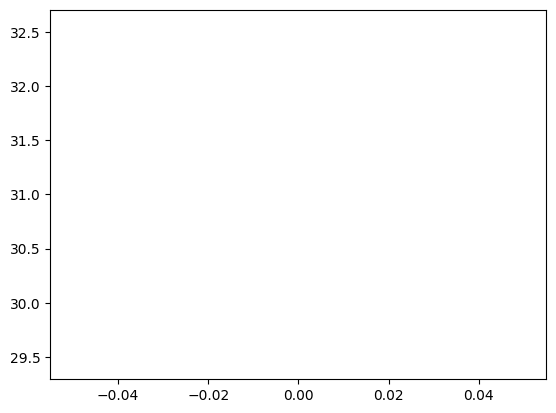

[31, 50]


SystemExit: 

In [13]:
import matplotlib.pyplot as plt

pg.init()
surface = pg.Surface((1200,576), pg.SRCALPHA)
screen=pg.display.set_mode((1200,576))
pg.display.set_caption("Hello")
clock=pg.time.Clock()
font = pg.font.Font('freesansbold.ttf', 22)
sky=pg.image.load('game_dev/finalbg.jpg').convert()
pipe=pg.image.load('game_dev/pipe.png').convert_alpha()
pipe=pg.transform.scale(pipe,(100,500))
pipet=pg.transform.rotate(pipe,180)
pipet=pg.transform.flip(pipet,True,False)
pipet_rect=pipet.get_rect(topleft=(1200,-50))
pipe_rect=pipe.get_rect(topleft=(1200,300))
pipe_rect_copy=pipe.get_rect(topleft=(550,300))
pipet_rect_copy=pipet.get_rect(topleft=(550,-50))
bird=pg.image.load('game_dev/bird.png').convert_alpha()
bird=pg.transform.scale(bird,(70,50))
bird_rect=bird.get_rect(center=(100,100))
sbt=font.render("START",True,"red")
sbt_rect=sbt.get_rect(center=(600,288))
screen.blit(sbt,sbt_rect)
l=[]
#defining timer for the obstacles to occur
for i in range(1000000):
    bird_rect=bird.get_rect(center=(100,400))
    timer=pg.USEREVENT+1
    pg.time.set_timer(timer,980)

    #bird=pg.transform.rotate(bird,-30)
    random.seed(1)
    y1=400+random.randint(-50,50)
    random.seed(2)
    y2=300+random.randint(-50,50)
    random.seed(3)
    y3=350+random.randint(-50,50)
    obs_list=[[500,y1],[900,y2],[1300,y3]]
    obst_list=[[500,y1-750],[900,y2-750],[1300,y3-750]]
    t=0
    a=0
    score="0"
    s=bird_rect.centery
    text = font.render(score, True, (77,208,225))
    text_rect = text.get_rect(center=(600,80))
    el=pg.draw.circle(surface,"blue",bird_rect.center,20)
    done=False
    cur_st=[0,0,0]
    cur_st[0]=(obs_list[0][0]-100)/4
    cur_st[1]=obs_list[0][1]-bird_rect.centery+301
    cur_st[2]=0
    smax=0
    while not done:
        #draw everything and update
        for event in pg.event.get():
            if event.type==pg.QUIT:
                print(l)
                pg.quit()
                sys.exit()
            #if event.type==pg.KEYDOWN:
                #s=s+t*t-t*a
                #a=21
                #t=0.5
            if event.type==timer:
                x=1200
                y=400+random.randint(-150,100)
                obs_list.append([x,y])
                obst_list.append([x,y-750])
        # defining thr rectangle postions
        el=pg.draw.circle(surface,"blue",bird_rect.center,20)
        
        #S
        
        screen.blit(sky,(-100,0))
        bird_rect.centery=s+t*t-t*a
        v=a-t*2
        screen.blit(bird,bird_rect)
        screen.blit(text,text_rect)

        obs_list,obst_list=obstacle_render(obs_list,obst_list)
        cur_st_en=create_tile_encoding(cur_st)
        #A
        if random.uniform(0,1)<eps:
            action=random.randint(0,1)
        else:
            action=np.argmax(Q_value[tuple(cur_st_en)])
        cur_st.append(action)
        cur_st_en.append(action)
        
        #S'
        next_state=get_next_state(cur_st,obs_list)
        next_state_en=create_tile_encoding(next_state)
        # in one time stamp x reduces by one and y by an amout specified by an equation of motion
        # so in order to find the subsequent states i would need to do a lookahead in the s using a hypothetical 
        # jump or no jump and then check the max of q values of both states and decide greedly....

        
        
        if cur_st[3]==0:
            ys=s+(t+0.5)*(t+0.5)-(t+0.5)*a
        else:
            ys=s+t*t-t*a + 0.5*0.5 -0.5*21
        el1=pg.draw.circle(surface,(0, 0, 255, 0),(104,ys),20)
        if  el1.colliderect(pipe.get_rect(topright=obs_list[0])) or el1.colliderect(pipet.get_rect(topright=obst_list[0])) or el1.bottom>=561 or el1.top<=5:
            reward=-1000
            done=True
            Q_value[tuple(cur_st_en)]+=td_error*(reward-Y*Q_value[tuple(cur_st_en)])
        else:
            if random.uniform(0,1)<eps:
                action_next=random.randint(0,1)
            else:
                action_next=np.argmax(Q_value[tuple(next_state_en)])
            next_state.append(action_next)
            next_state_en.append(action_next)
            reward=0.5
            if next_state[0]==0:
                reward=10
            Q_value[tuple(cur_st_en)]+=td_error*(reward + Y*(Q_value[tuple(next_state_en)]-Q_value[tuple(cur_st_en)]))

        if action==1:
            s=s+t*t-t*a
            t=0
            a=21

        if obs_list and el.right==obs_list[0][0]+16:
            score=str(eval(score)+1)
            smax=max(0,eval(score))
            text = font.render(score, True,(77,208,225))
        #if (obs_list and obst_list and (el.colliderect(pipe.get_rect(topleft=obs_list[0])) or el.colliderect(pipet.get_rect(topleft=obst_list[0])))) or bird_rect.bottom>=576 or bird_rect.top<=0:
            #pg.quit()
            #sys.exit()

        t=t+0.5
        cur_st=[next_state[0],next_state[1],next_state[2]]
        #print(next_state[1])
        pg.display.update()
        clock.tick(120)
        screen.blit(surface,(0,0))
    l.append(smax)
    #print(i)
    if i%100==0 and i==0:
        plt.plot(np.arange(i+1),l)
        plt.show()
        eps/=10
    
    

In [9]:
# NOTE: NEVER RUN THIS CELL IF YOU HAVE UPDATED Q_VALUE IN NEGATIVE DIRECTION
#
#
#
#np.save("data_file_best_1.npy", Q_value)

# Saving to a text file (.txt or .csv)
#np.savetxt("data_file_best_1.txt", Q_value.flatten())

In [8]:
Q_value

array([[[[    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         ...,
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ]],

        [[    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         ...,
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ]],

        [[    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         ...,
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ]],

        ...,

        [[    0.        ,     0.        ],
         [    0.        ,     0.        ],
         [    0.        ,     0.        ],
         ...,
         [    0.     

In [8]:
eps=0.000000000000001